# DetecionMetrics basic tutorial
DetectionMetrics provides a unified evaluation pipeline for perception models, currently focused in semantic segmentation in unstructured environments. For this basic tutorial, we are going to evaluate an image segmentation model against Rellis3D.

## Download required data

#### Dataset (Rellis3D)
📝 [Paper](https://arxiv.org/abs/2011.12954)
🧑‍💻️ [Repo](https://github.com/unmannedlab/RELLIS-3D)

In [ ]:
!pip install gdown

In [ ]:
!mkdir -p local/data && cd local/data

# Download
!gdown 1zHmnVaItcYJAWat3Yti1W_5Nfux194WQ -O local/data/  # split
!gdown 1K8Zf0ju_xI5lnx3NTDLJpVTs59wmGPI6 -O local/data/  # ontology
!gdown 16URBUQn_VOGvUqfms-0I8HHKMtjPHsu5 -O local/data/  # labels
!gdown 1F3Leu0H_m6aPVpZITragfreO_SGtL2yV -O local/data/  # images

In [ ]:
# Unzip
!unzip -o local/data/Rellis_3D_image_split.zip -d local/data/rellis3d/
!unzip -o local/data/Rellis_3D_ontology.zip -d local/data/rellis3d/
!unzip -o local/data/Rellis_3D_pylon_camera_node_label_id.zip -d local/data/rellis3d/
!unzip -o local/data/Rellis_3D_pylon_camera_node.zip -d local/data/rellis3d/

#### Model (PyTorch)

In [ ]:
# Download
!gdown 15Py3AKyGzWNX4M3OJKlQQsnH6IehkoEd -O local/data/image_segmentation_model.pth            # model
!gdown 17eJ6aei6yBAbK1aA4mhTeMdXYycorqcT -O local/data/image_segmentation_model_cfg.json       # configuration
!gdown 1spXt5_ISG1ZaHHO2DTtCSqgkohnhwuzt -O local/data/image_segmentation_model_ontology.json  # ontology

## Init dataset and model objects

In [ ]:
from detectionmetrics.datasets import Rellis3DImageSegmentationDataset
from detectionmetrics.models import TorchImageSegmentationModel

dataset = Rellis3DImageSegmentationDataset(
    dataset_dir="local/data/rellis3d/Rellis-3D",
    split_dir="local/data/rellis3d",
    ontology_fname="local/data/rellis3d/Rellis_3D_ontology/ontology.yaml",
)

model = TorchImageSegmentationModel(
    model="local/data/image_segmentation_model.pth",
    model_cfg="local/data/image_segmentation_model_cfg.json",
    ontology_fname="local/data/image_segmentation_model_ontology.json",
)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Tensorflow not available
Samples retrieved: 5957 / 5957


## Inference

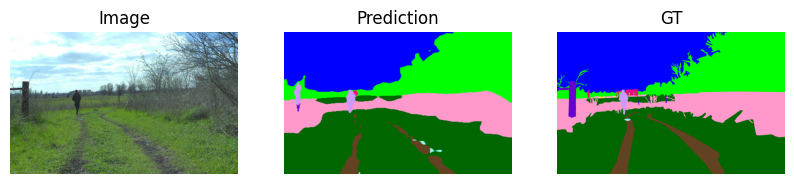

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

from detectionmetrics.utils import conversion as uc

image_fname = dataset.dataset["image"].iloc[0]
image = Image.open(image_fname)

label_fname = dataset.dataset["label"].iloc[0]
label = Image.open(label_fname)
label = uc.label_to_rgb(label, dataset.ontology)

pred = model.inference(image)
pred = uc.label_to_rgb(pred, model.ontology)
pred = pred.resize(label.size)

plt.figure(figsize=(10, 10))
plt.subplot(131), plt.title("Image"), plt.imshow(np.array(image)), plt.axis("off")
plt.subplot(132), plt.title("Prediction"), plt.imshow(np.array(pred)), plt.axis("off")
plt.subplot(133), plt.title("GT"), plt.imshow(np.array(label)), plt.axis("off")
plt.show()

## Evaluation

In [3]:
results = model.eval(dataset, split="test")
display(results)

100%|██████████| 1672/1672 [05:09<00:00,  5.40it/s]


,void,dirt,grass,tree,pole,water,sky,vehicle,object,asphalt,...,log,person,fence,bush,concrete,barrier,puddle,mud,rubble,global
iou,0.0,0.0,0.830637,0.676358,0.0,0.0,0.949209,0.000099,0.054734,0.010433,...,0.0,0.243223,0.034028,0.591416,0.619029,0.049902,0.342479,0.165755,0.081605,0.232445
acc,0.0,0.0,0.956694,0.852252,0.0,0.0,0.978539,0.000134,0.076466,0.041492,...,0.0,0.870784,0.023046,0.734917,0.809408,0.265849,0.756522,0.250438,0.165216,0.895927
